### Data exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
# import osmnx as ox
import contextily as cx
# import geodatasets
# import folium
# from shapely.geometry import Point


In [3]:
df = pd.read_csv("MVG_Rad_Fahrten_2023.csv", sep=";", decimal=",", parse_dates=["STARTTIME       ", "ENDTIME         "])
df.head()

/var/folders/pd/zg0xw_j14k3gvz5jqksfy67m0000gn/T/ipykernel_69128/1253889411.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("MVG_Rad_Fahrten_2023.csv", sep=";", decimal=",", parse_dates=["STARTTIME       ", "ENDTIME         "])


,Row,STARTTIME,ENDTIME,STARTLAT,STARTLON,ENDLAT,ENDLON,RENTAL_IS_STATION,RENTAL_STATION_NAME,RETURN_IS_STATION,RETURN_STATION_NAME
0,1,2023-01-01 00:26:00,2023-01-01 00:51:00,48.13795,11.54569,48.16123,11.55782,0,,1,Barbarastr
1,2,2023-01-01 00:30:00,2023-01-01 00:42:00,48.12903,11.54431,48.14797,11.53445,0,,0,
2,3,2023-01-01 00:32:00,2023-01-01 00:45:00,48.16841,11.55566,48.16467,11.57649,0,,0,
3,4,2023-01-01 00:34:00,2023-01-01 00:46:00,48.16843,11.55567,48.16464,11.57648,0,,0,
4,5,2023-01-01 00:35:00,2023-01-01 00:51:00,48.17104,11.54878,48.16243,11.53007,0,,0,


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 710106 entries, 0 to 710105
Data columns (total 11 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   Row                                           710106 non-null  int64         
 1   STARTTIME                                     710106 non-null  datetime64[ns]
 2   ENDTIME                                       710106 non-null  datetime64[ns]
 3   STARTLAT                                      710106 non-null  float64       
 4   STARTLON                                      710106 non-null  float64       
 5   ENDLAT                                        710106 non-null  float64       
 6   ENDLON                                        710106 non-null  float64       
 7   RENTAL_IS_STATION                             710106 non-null  object        
 8   RENTAL_STATION_NAME                           710106 n

In [5]:
df["RENTAL_IS_STATION"].value_counts() # erwartet: 0, 1

RENTAL_IS_STATION
0                    498665
1                    144141
0                     51169
1                     14170
12                     1720
12                      197
                         44
Name: count, dtype: int64

In [6]:
df["RETURN_IS_STATION"].value_counts() # erwartet: 0, 1

RETURN_IS_STATION
0                    583801
1                    123809
12                     2436
                         60
Name: count, dtype: int64

In [7]:
df.describe()

,Row,STARTTIME,ENDTIME,STARTLAT,STARTLON,ENDLAT,ENDLON
count,710106.000000,710106,710106,710106.000000,710106.000000,710106.000000,710106.000000
mean,355053.500000,2023-07-03 20:01:02.147932928,2023-07-03 20:28:35.743255296,47.610000,11.772959,47.589505,11.720168
min,1.000000,2023-01-01 00:26:00,2023-01-01 00:42:00,0.000000,-71.178000,-55.973800,-99.259350
25%,177527.250000,2023-05-06 16:43:00,2023-05-06 17:17:15,48.128250,11.549040,48.128300,11.549040
50%,355053.500000,2023-07-04 19:35:00,2023-07-04 19:54:00,48.143190,11.567820,48.143190,11.567710
75%,532579.750000,2023-09-07 20:35:00,2023-09-07 21:04:00,48.159040,11.584500,48.159020,11.584430
max,710106.000000,2023-12-31 23:54:00,2024-01-01 16:00:00,53.094660,141.353220,53.094660,141.353220
std,204990.089464,NaN,NaN,5.045196,3.141217,5.170640,3.034583


In [8]:
# Spaltennamen
df.columns

Index(['Row   ', 'STARTTIME       ', 'ENDTIME         ', 'STARTLAT',
       'STARTLON ', 'ENDLAT  ', 'ENDLON   ', 'RENTAL_IS_STATION',
       'RENTAL_STATION_NAME                         ', 'RETURN_IS_STATION',
       'RETURN_STATION_NAME                         '],
      dtype='object')

In [9]:
# Übersicht Anzahl Ausleihen ab Station
print(df["RENTAL_STATION_NAME                         "].value_counts())

RENTAL_STATION_NAME                         
                                                551795
Sandstraße                                        3570
Hauptbahnhof Nord                                 2654
TUM Arcisstraße                                   2649
Münchner Freiheit                                 2428
                                                 ...  
Tölzer Straße Otterloh                              17
Domagkstraße Kirchheim                              12
Am Sportpark Feldkirchen                            11
Waldsiedlung Faistenhaar                             9
Bogenstraße Waldbrunn                                4
Name: count, Length: 332, dtype: int64


In [10]:
# Welche Stationen gibt es?
stations = df["RETURN_STATION_NAME                         "].unique()
stations.sort()
print(stations)
print(len(stations))

['                                            '
 'AGROB Nord Ismaning                         '
 'AGROB Süd Ismaning                          '
 'Ackermannstraße                             '
 'Ahornring Taufkirchen                       '
 'Ainmillerstraße                             '
 'Albrechtstraße                              '
 'Alte Heide                                  '
 'Altes Rathaus Unterschleißheim              '
 'Am Bahnhof Unterföhring                     '
 'Am Glockenbach                              '
 'Am Haag Gräfelfing                          '
 'Am Haderner Winkel Neuried                  '
 'Am Hart                                     '
 'Am See Haar                                 '
 'Am Sportpark Aschheim                       '
 'Am Sportpark Feldkirchen                    '
 'Am Sportpark Neuried                        '
 'Am Sportpark Unterhaching                   '
 'Am Weiher Unterschleißheim                  '
 'Amalienburgstraße                     

In [11]:
# Wieviele Rückgaben an Beispielstation
df["RETURN_STATION_NAME                         "].value_counts().get("Ackermannstraße                             ")

np.int64(513)

In [12]:
# Wieviele Ausleihen an Beispielstation
df["RENTAL_STATION_NAME                         "].value_counts().get("Ackermannstraße                             ")

np.int64(837)

In [13]:
# Stationsausleihen insgesamt
rentals = pd.DataFrame(df["RENTAL_STATION_NAME                         "].value_counts())
rentals = rentals.reset_index()
rentals = rentals.rename(columns={"RETURN_STATION_NAME                         ": "STATION_NAME"})
rentals

,RENTAL_STATION_NAME,count
0,,551795
1,Sandstraße,3570
2,Hauptbahnhof Nord,2654
3,TUM Arcisstraße,2649
4,Münchner Freiheit,2428
...,...,...
327,Tölzer Straße Otterloh,17
328,Domagkstraße Kirchheim,12
329,Am Sportpark Feldkirchen,11
330,Waldsiedlung Faistenhaar,9


In [14]:
# Stationsrückgaben insgesamt
returns = pd.DataFrame(df["RETURN_STATION_NAME                         "].value_counts())
returns = returns.reset_index()
returns = returns.rename(columns={"RETURN_STATION_NAME                         ": "STATION_NAME"})
returns

,STATION_NAME,count
0,,586297
1,Sandstraße,3049
2,Hauptbahnhof Nord,2492
3,TUM Arcisstraße,2157
4,Olympiazentrum,2109
...,...,...
327,Am Sportpark Feldkirchen,13
328,Ferd.-Kobell-Straße Haar,12
329,Parkplatz Grünwald,11
330,Waldsiedlung Faistenhaar,7


In [15]:
# An wievielen Stationen weniger Ausleihen als Rückgaben
diff = rentals["count"] - returns["count"]
len(diff[diff < 1])

23

In [17]:
# Ergänze Fahrtdauer
df["Dauer"] = df['ENDTIME         '] - df['STARTTIME       ']

In [18]:
df.head()

,Row,STARTTIME,ENDTIME,STARTLAT,STARTLON,ENDLAT,ENDLON,RENTAL_IS_STATION,RENTAL_STATION_NAME,RETURN_IS_STATION,RETURN_STATION_NAME,Dauer
0,1,2023-01-01 00:26:00,2023-01-01 00:51:00,48.13795,11.54569,48.16123,11.55782,0,,1,Barbarastr,0 days 00:25:00
1,2,2023-01-01 00:30:00,2023-01-01 00:42:00,48.12903,11.54431,48.14797,11.53445,0,,0,,0 days 00:12:00
2,3,2023-01-01 00:32:00,2023-01-01 00:45:00,48.16841,11.55566,48.16467,11.57649,0,,0,,0 days 00:13:00
3,4,2023-01-01 00:34:00,2023-01-01 00:46:00,48.16843,11.55567,48.16464,11.57648,0,,0,,0 days 00:12:00
4,5,2023-01-01 00:35:00,2023-01-01 00:51:00,48.17104,11.54878,48.16243,11.53007,0,,0,,0 days 00:16:00


In [19]:
df.Dauer.min()

Timedelta('-1 days +23:04:00')

In [20]:
# Rückgabe vor Ausleihe

mask = (df['ENDTIME         '] < df['STARTTIME       '])
df.loc[mask]

,Row,STARTTIME,ENDTIME,STARTLAT,STARTLON,ENDLAT,ENDLON,RENTAL_IS_STATION,RENTAL_STATION_NAME,RETURN_IS_STATION,RETURN_STATION_NAME,Dauer
643458,643459,2023-10-29 02:37:00,2023-10-29 02:16:00,48.12044,11.57651,48.17835,11.57484,1,Kolumbusplatz,0,,-1 days +23:39:00
643465,643466,2023-10-29 02:41:00,2023-10-29 02:00:00,48.13998,11.50744,48.11326,11.53177,0,,0,,-1 days +23:19:00
643478,643479,2023-10-29 02:49:00,2023-10-29 02:04:00,48.14395,11.55688,48.17062,11.53471,0,,0,,-1 days +23:15:00
643479,643480,2023-10-29 02:50:00,2023-10-29 02:18:00,48.12452,11.55557,48.13293,11.50309,1,Zenettiplatz,0,,-1 days +23:28:00
643482,643483,2023-10-29 02:52:00,2023-10-29 02:10:00,48.13000,11.57317,48.13107,11.60504,0,,0,,-1 days +23:18:00
643483,643484,2023-10-29 02:52:00,2023-10-29 02:07:00,48.16184,11.58603,48.15727,11.56178,0,,0,,-1 days +23:15:00
643485,643486,2023-10-29 02:54:00,2023-10-29 02:32:00,48.18261,11.55426,48.16695,11.62009,0,,0,,-1 days +23:38:00
643489,643490,2023-10-29 02:55:00,2023-10-29 02:25:00,48.15124,11.56574,48.13593,11.63376,0,,1,Berg am Laim,-1 days +23:30:00
643490,643491,2023-10-29 02:55:00,2023-10-29 02:31:00,48.18258,11.55436,48.16693,11.62008,0,,0,,-1 days +23:36:00
643494,643495,2023-10-29 02:56:00,2023-10-29 02:06:00,48.13114,11.58220,48.13114,11.58220,1,Boschbrücke,1,Boschbrücke,-1 days +23:10:00


In [21]:
# Geodaten, Anzeige auf Karte
geo = gpd.points_from_xy(y=df['STARTLAT'], x=df['STARTLON '])
gdf = gpd.GeoDataFrame(df, geometry=geo)
gdf

,Row,STARTTIME,ENDTIME,STARTLAT,STARTLON,ENDLAT,ENDLON,RENTAL_IS_STATION,RENTAL_STATION_NAME,RETURN_IS_STATION,RETURN_STATION_NAME,Dauer,geometry
0,1,2023-01-01 00:26:00,2023-01-01 00:51:00,48.13795,11.54569,48.16123,11.55782,0,,1,Barbarastr,0 days 00:25:00,POINT (11.54569 48.13795)
1,2,2023-01-01 00:30:00,2023-01-01 00:42:00,48.12903,11.54431,48.14797,11.53445,0,,0,,0 days 00:12:00,POINT (11.54431 48.12903)
2,3,2023-01-01 00:32:00,2023-01-01 00:45:00,48.16841,11.55566,48.16467,11.57649,0,,0,,0 days 00:13:00,POINT (11.55566 48.16841)
3,4,2023-01-01 00:34:00,2023-01-01 00:46:00,48.16843,11.55567,48.16464,11.57648,0,,0,,0 days 00:12:00,POINT (11.55567 48.16843)
4,5,2023-01-01 00:35:00,2023-01-01 00:51:00,48.17104,11.54878,48.16243,11.53007,0,,0,,0 days 00:16:00,POINT (11.54878 48.17104)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
710101,710102,2023-12-31 23:52:00,2023-12-31 23:57:00,48.16719,11.55854,48.16917,11.55547,0,,0,,0 days 00:05:00,POINT (11.55854 48.16719)
710102,710103,2023-12-31 23:52:00,2024-01-01 00:07:00,48.17061,11.57391,48.17334,11.55952,0,,0,,0 days 00:15:00,POINT (11.57391 48.17061)
710103,710104,2023-12-31 23:53:00,2023-12-31 23:57:00,48.14131,11.56144,48.14094,11.56044,0,,0,,0 days 00:04:00,POINT (11.56144 48.14131)
710104,710105,2023-12-31 23:54:00,2023-12-31 23:59:00,48.12353,11.54494,48.12674,11.54758,0,,0,,0 days 00:05:00,POINT (11.54494 48.12353)


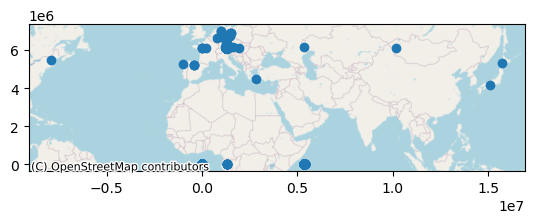

In [34]:
ax = gdf.plot()
cx.add_basemap(ax, crs ="EPSG:3857", source=cx.providers.OpenStreetMap.Mapnik)

In [ ]:
# City als Hintergrund
# city = ox.geocode_to_gdf("Munich, Bavaria, Germany")
# fig, ax = plt.subplots(figsize=(15, 15))
# city.plot(ax=ax)

In [26]:
# geo2 = [Point(lon, lat) for lon, lat in zip(df["STARTLON "], df["STARTLAT"])]
# gdf2 = gpd.GeoDataFrame(df, geometry=geo2)

# gdf2.plot(marker="o", figsize=(10,10))
# plt.show()

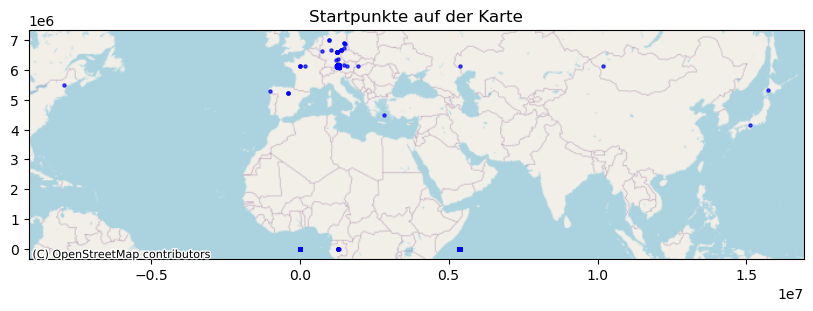

In [ ]:
# CRS-Daten
gdf.crs = "EPSG:4326"
gdf = gdf.to_crs(epsg=3857)

# Plotten des GeoDataFrames
fig, ax = plt.subplots(figsize=(10, 10))

# Plotten der Punkte
gdf.plot(ax=ax, marker='o', color='blue', markersize=5, alpha=0.7)

# Füge die Basemap von contextily hinzu
cx.add_basemap(ax, crs=gdf.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)

# Achsentitel und Anzeige der Karte
ax.set_title('Startpunkte auf der Karte')
plt.show()

In [ ]:
# Test mit Folium, zu viele Daten!
# map_center = [df['STARTLAT'].mean(), df['STARTLON '].mean()]
# my_map = folium.Map(location=map_center, zoom_start=6)

In [ ]:
# Auswertung Startlat
startlat_values = df["STARTLAT"].values
pd.DataFrame(startlat_values).describe()

,0
count,710106.000000
mean,47.610000
std,5.045196
min,0.000000
25%,48.128250
50%,48.143190
75%,48.159040
max,53.094660


In [28]:
# Auswertung Startlon
startlon_values = df["STARTLON "].values
pd.DataFrame(startlon_values).describe()

,0
count,710106.000000
mean,11.772959
std,3.141217
min,-71.178000
25%,11.549040
50%,11.567820
75%,11.584500
max,141.353220


In [29]:
# Wo/Wie oft Startlat kleiner als 48?
df[(df["STARTLAT"] < 48)]

,Row,STARTTIME,ENDTIME,STARTLAT,STARTLON,ENDLAT,ENDLON,RENTAL_IS_STATION,RENTAL_STATION_NAME,RETURN_IS_STATION,RETURN_STATION_NAME,Dauer
117,118,2023-01-01 02:29:00,2023-01-01 02:59:00,0.0,0.00000,48.14649,11.59422,0,,0,,0 days 00:30:00
304,305,2023-01-01 06:04:00,2023-01-01 06:09:00,0.0,0.00000,48.16477,11.59476,12,,0,,0 days 00:05:00
463,464,2023-01-01 12:36:00,2023-01-01 13:55:00,0.0,0.00000,48.15968,11.59849,0,,0,,0 days 01:19:00
514,515,2023-01-01 13:12:00,2023-01-01 16:56:00,0.0,0.00000,48.12088,11.60065,12,,0,,0 days 03:44:00
518,519,2023-01-01 13:13:00,2023-01-01 15:54:00,0.0,0.00000,48.05871,11.52197,12,,1,Pullach Bahnhof Pullach im Isartal,0 days 02:41:00
...,...,...,...,...,...,...,...,...,...,...,...,...
708753,708754,2023-12-30 09:16:00,2023-12-30 09:25:00,0.0,48.12555,48.12722,11.56756,12,,0,,0 days 00:09:00
708922,708923,2023-12-30 13:01:00,2023-12-30 14:07:00,0.0,0.00000,48.17914,11.59966,12,,0,,0 days 01:06:00
709095,709096,2023-12-30 15:14:00,2023-12-31 17:30:00,0.0,0.00000,0.00000,0.00000,12,,12,,1 days 02:16:00
709316,709317,2023-12-30 18:55:00,2023-12-30 19:00:00,0.0,48.15140,48.15514,11.56676,0,,1,Josephsplatz,0 days 00:05:00


In [30]:
df.RENTAL_IS_STATION.unique()

array(['0                ', '1                ', '12               ',
       '                 ', 0, 1, 12], dtype=object)

In [31]:
df[(df["RENTAL_IS_STATION"] == 12) & (df["RENTAL_STATION_NAME                         "] != "                                            ")]

,Row,STARTTIME,ENDTIME,STARTLAT,STARTLON,ENDLAT,ENDLON,RENTAL_IS_STATION,RENTAL_STATION_NAME,RETURN_IS_STATION,RETURN_STATION_NAME,Dauer


### Reparaturbedarf:
- Spaltennamen
- Werte formatieren und löschen RETURN_IS_STATION und RENTAL_IS_STATION ("0" > 0, "1" > 1, 12 > 0, "12" > 0)
- Rückgabe vor Ausleihe
- LAT zwischen 48.0 und 48.3
- LON zwischen 11.3 und 11.8
- Stationennamen händisch prüfen